# **Ethereum Analysis: Modal & Formal**

# Analysis Source Code

## Analysis Source Code: Data Import

In [2]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

def import_data(file=None, timeline=False, timeline_col=None, sep=',', infer_dt_format=True):
  if file is None:
    return None
  else:
    df = read_csv(file, sep=sep)
  
  if timeline is True:
    if timeline_col is None:
      return None
    
    else:
      if infer_dt_format is True:
        df[timeline_col] = pd.to_datetime(df[timeline_col], infer_datetime_format=True)
      else:
        df[timeline_col] = pd.to_datetime(df[timeline_col], format="%Y-%m").dt.to_period('M')
      df.set_index(timeline_col, inplace=True)

  print("\n\n\nDataset preview:")
  display(df)
  
  return df


## Analysis Source Code: Data Smoothening

In [3]:
def set_rolling_data(df=None, rolling=50000):
  if df is None:
    return None
  else:
    rolling_data = df.rolling(window=rolling).mean()
    
    print(f"\n\n\nDataset mean preview, rolling with {rolling} samples:")
    display(rolling_data)

    return rolling_data


In [4]:
from sklearn.preprocessing import StandardScaler

def dataset_scaling(df = None):
  if df is None:
    return None
  
  scaler = StandardScaler()
  scaler.fit(df)
  
  return scaler.transform(df)

# Ethereum Time Analysis

## Ethereum Time Analysis: Data Import

In [5]:
eth_times_file = "/content/drive/MyDrive/output_eth_times.tsv"
eth_times = import_data(file = eth_times_file, timeline=True, timeline_col='Month',
                        sep='\t', infer_dt_format=False)




Dataset preview:


,Transaction_Counts
Month,
2015-08,85112
2015-09,174134
2015-10,205213
2015-11,234733
2015-12,347092
2016-01,404816
2016-02,520040
2016-03,916363
2016-04,1022504


In [6]:
avg_eth_times_file = "/content/drive/MyDrive/output_eth_avgtimes.tsv"
avg_eth_times = import_data(file = avg_eth_times_file, timeline=True, timeline_col='Month',
                            sep='\t', infer_dt_format=False)




Dataset preview:


,Avg_Transaction_Value
Month,
2015-08,4.830278e+20
2015-09,7.047276e+19
2015-10,7.411289e+19
2015-11,5.948474e+19
2015-12,2.676410e+19
2016-01,6.106607e+19
2016-02,6.554761e+19
2016-03,4.587941e+19
2016-04,2.258293e+19


\
## Ethereum Time Analysis: Bar Plots

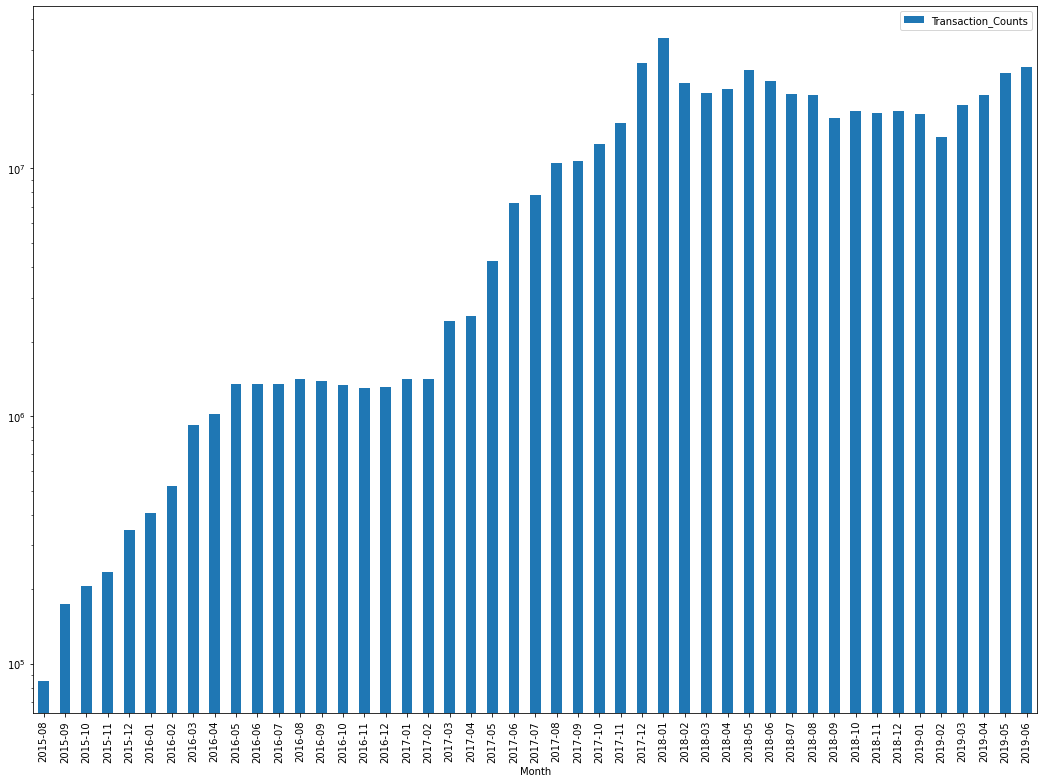

In [7]:
eth_times.plot(figsize=(18,13), kind='bar', logy=True)

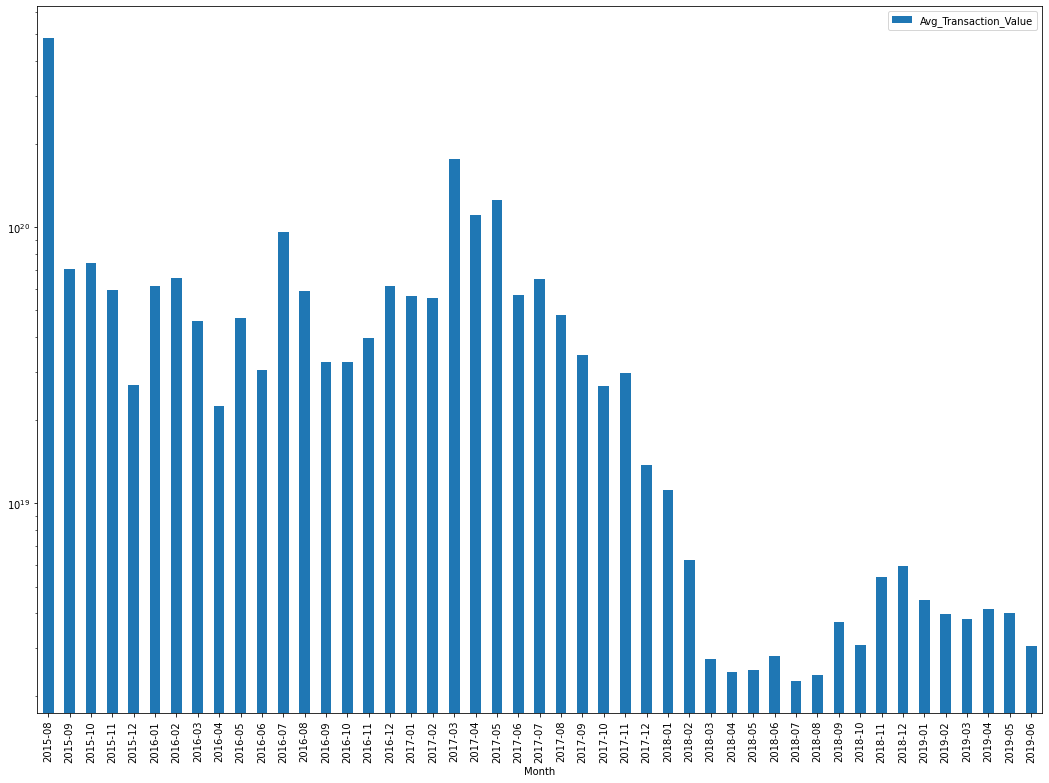

In [8]:
avg_eth_times.plot(figsize=(18,13), kind='bar', logy=True)

# Fork Analysis

## Fork Data Import

### Fork Data Import: Dataset

In [9]:
fork_analysis_merged_file = "/content/drive/MyDrive/fork-analysis-merged.csv"
fork_analysis = import_data(file = fork_analysis_merged_file, timeline=True, timeline_col='block_timestamp')




Dataset preview:


,value
block_timestamp,
2019-02-14 00:00:21+00:00,0.007000
2019-02-14 00:00:21+00:00,0.007000
2019-02-14 00:00:21+00:00,0.007000
2019-02-14 00:00:21+00:00,0.007000
2019-02-14 00:00:21+00:00,0.007000
...,...
2019-03-13 23:59:59+00:00,1.540628
2019-03-13 23:59:59+00:00,0.075069
2019-03-13 23:59:59+00:00,0.000032


### Fork Data Import: Smoothened Dataset

In [10]:
fork_analysis_smooth100K = set_rolling_data(df = fork_analysis, rolling=100000)
fork_analysis_smooth500K = set_rolling_data(df = fork_analysis)




Dataset mean preview, rolling with 100000 samples:


,value
block_timestamp,
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
...,...
2019-03-13 23:59:59+00:00,5.593198
2019-03-13 23:59:59+00:00,5.593198
2019-03-13 23:59:59+00:00,5.593040





Dataset mean preview, rolling with 50000 samples:


,value
block_timestamp,
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
2019-02-14 00:00:21+00:00,NaN
...,...
2019-03-13 23:59:59+00:00,3.455430
2019-03-13 23:59:59+00:00,3.455316
2019-03-13 23:59:59+00:00,3.455312


## Fork Data Analysis

### Fork Analysis: Raw Dataset

In [11]:
fork_analysis[fork_analysis['value'] == fork_analysis['value'].max()]

,value
block_timestamp,
2019-02-25 06:31:35+00:00,707111.854


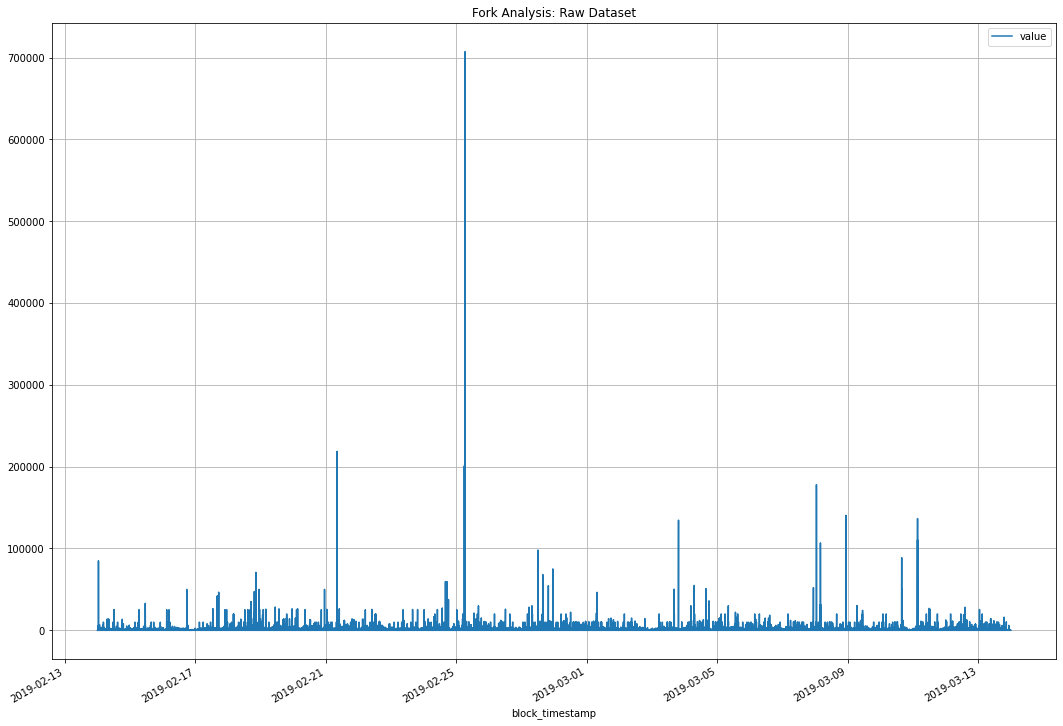

In [12]:
fork_analysis.plot(figsize=(18,13), grid=True, title='Fork Analysis: Raw Dataset')

### Fork Analysis: Smoothened Dataset

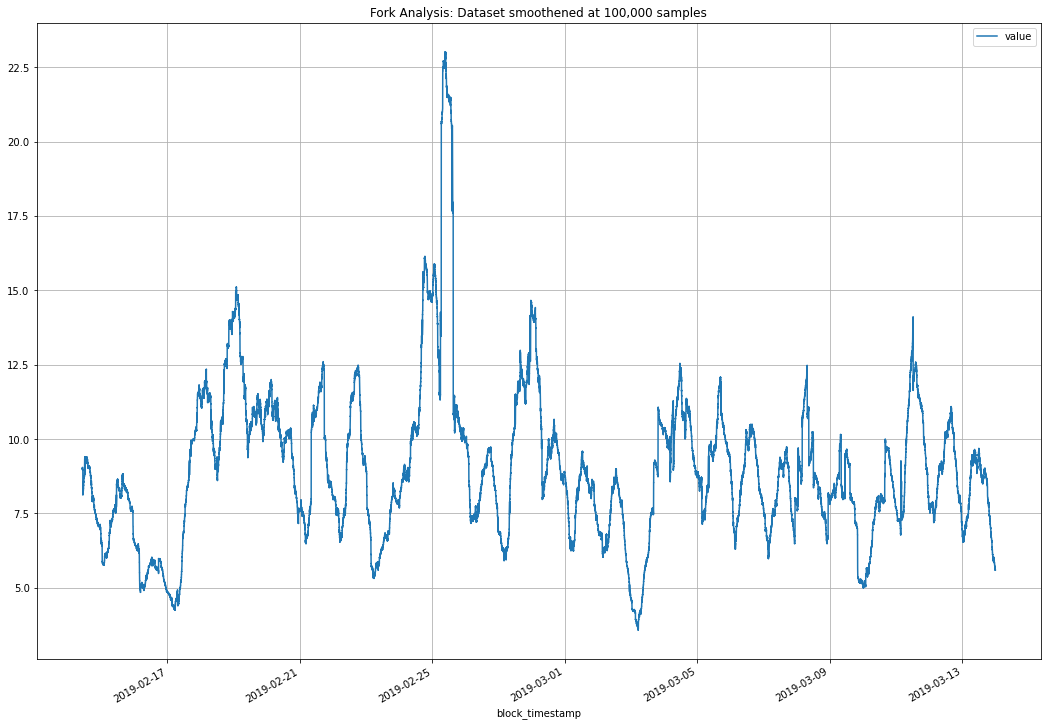

In [13]:
fork_analysis_smooth100K.plot(figsize=(18,13), grid=True, title='Fork Analysis: Dataset smoothened at 100,000 samples')

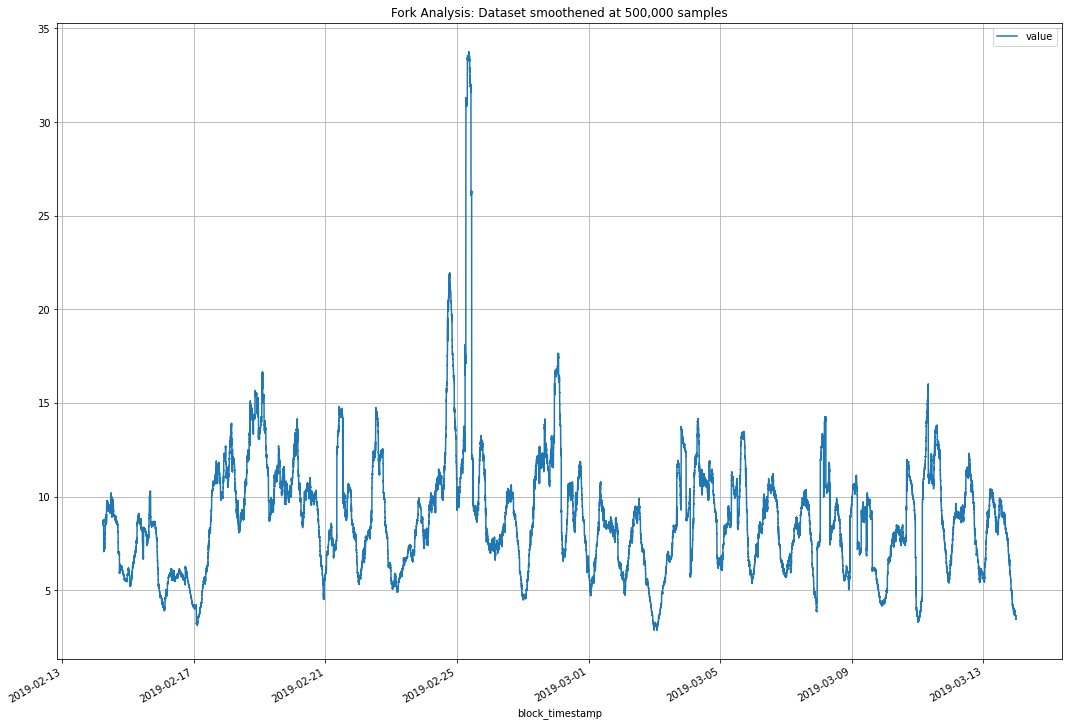

In [14]:
fork_analysis_smooth500K.plot(figsize=(18,13), grid=True, title='Fork Analysis: Dataset smoothened at 500,000 samples')

# Gas Analysis

## Gas Data Import

### Gas Data Import: Dataset

In [15]:
gas_analysis_merged_file = "/content/drive/MyDrive/gas-analysis-merged.csv"
gas_analysis = import_data(file = gas_analysis_merged_file, timeline=True, timeline_col='block_timestamp')




Dataset preview:


,total_value,gas,gas_price
block_timestamp,,,
2016-04-30 03:44:37+01:00,1.198361e+07,49900,2.000000e-08
2016-04-30 03:44:37+01:00,1.198361e+07,49900,2.000000e-08
2016-04-30 03:45:18+01:00,1.198361e+07,49900,2.000000e-08
2016-04-30 03:45:18+01:00,1.198361e+07,49900,2.000000e-08
2016-04-30 03:45:18+01:00,1.198361e+07,49900,2.000000e-08
...,...,...,...
2019-06-30 21:33:08+01:00,4.578748e+07,35000,8.050000e-09
2019-06-30 21:33:08+01:00,4.578748e+07,35000,8.050000e-09
2019-06-30 21:35:46+01:00,4.578748e+07,35000,8.050000e-09


### Gas Data Import: Smoothened Dataset

In [16]:
gas_analysis_smooth100K = set_rolling_data(df = gas_analysis, rolling=100000)
gas_analysis_smooth500K = set_rolling_data(df = gas_analysis)




Dataset mean preview, rolling with 100000 samples:


,total_value,gas,gas_price
block_timestamp,,,
2016-04-30 03:44:37+01:00,NaN,NaN,NaN
2016-04-30 03:44:37+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
...,...,...,...
2019-06-30 21:33:08+01:00,3.768108e+07,53945.81919,2.223915e-08
2019-06-30 21:33:08+01:00,3.768108e+07,53945.81919,2.223919e-08
2019-06-30 21:35:46+01:00,3.768111e+07,53945.66919,2.223875e-08





Dataset mean preview, rolling with 50000 samples:


,total_value,gas,gas_price
block_timestamp,,,
2016-04-30 03:44:37+01:00,NaN,NaN,NaN
2016-04-30 03:44:37+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
2016-04-30 03:45:18+01:00,NaN,NaN,NaN
...,...,...,...
2019-06-30 21:33:08+01:00,3.973968e+07,51433.50116,2.173133e-08
2019-06-30 21:33:08+01:00,3.974029e+07,51431.20116,2.173049e-08
2019-06-30 21:35:46+01:00,3.974029e+07,51431.20116,2.173042e-08


## Gas Data Analysis

### Gas Analysis: Raw Dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0ae4f630>,
      dtype=object)

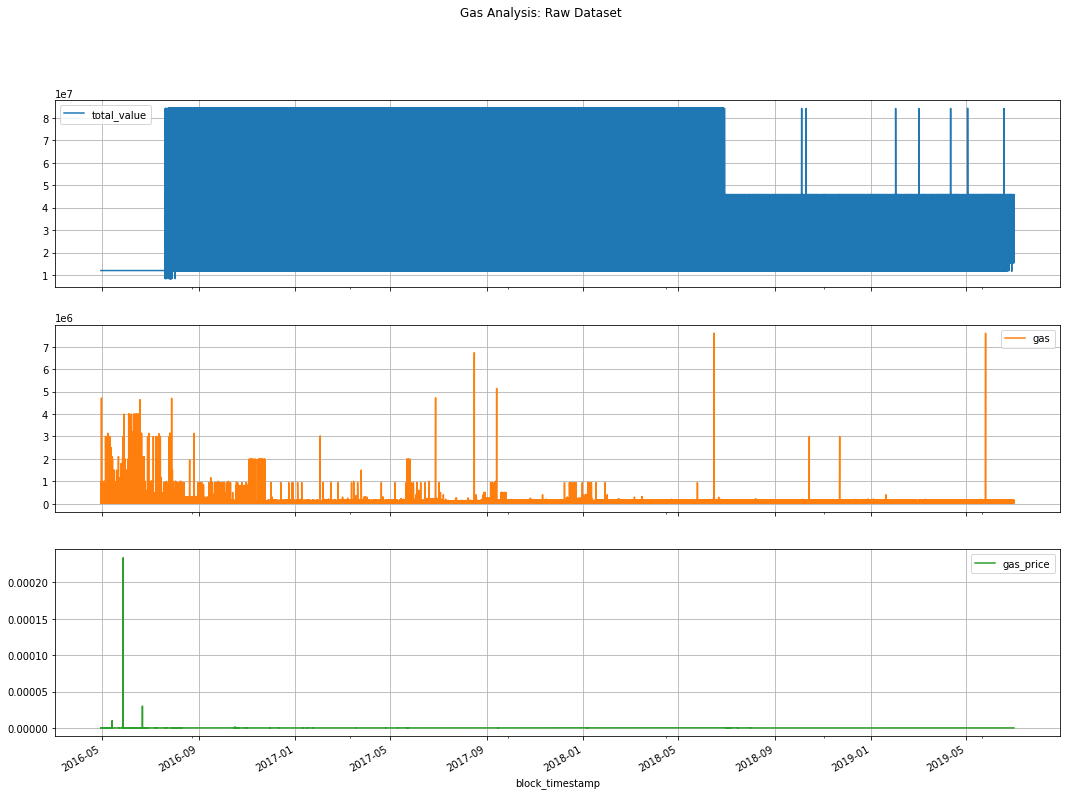

In [17]:
gas_analysis.plot(figsize=(18,13), grid=True,
                  subplots=True,
                  sharex=True,
                  title='Gas Analysis: Raw Dataset')

### Gas Analysis: Smoothened Dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e09ed7320>,
      dtype=object)

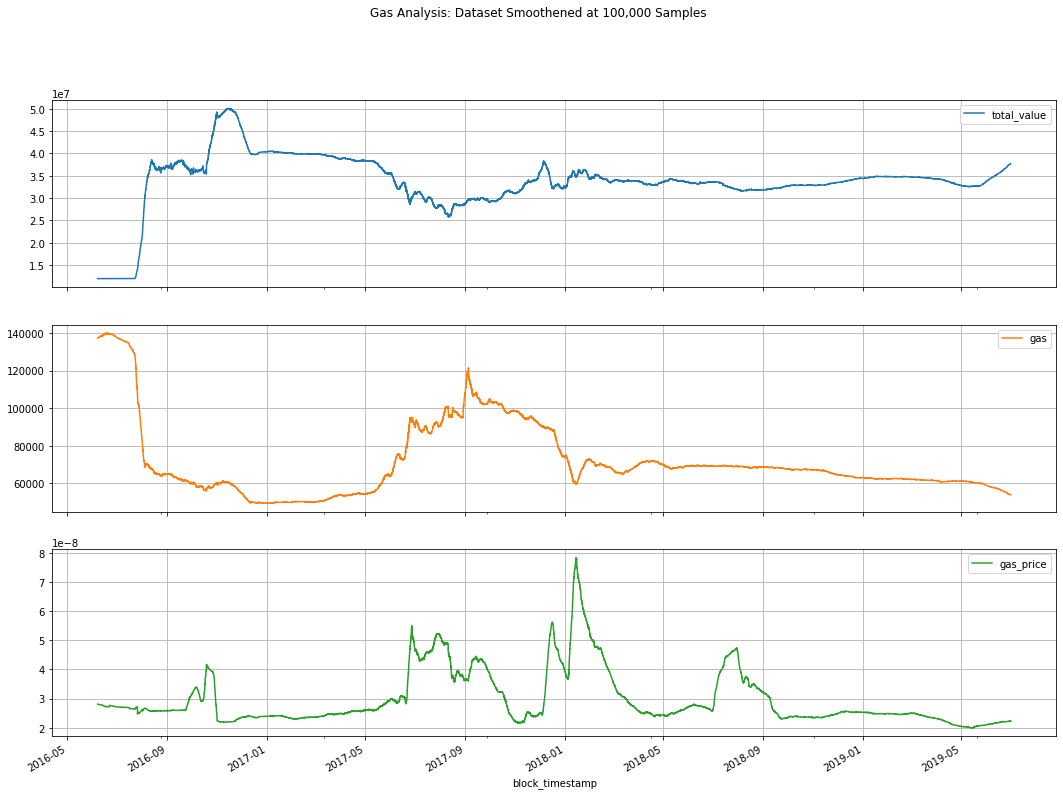

In [18]:
gas_analysis_smooth100K.plot(figsize=(18,13), grid=True,
                             subplots=True,
                             sharex=True, sharey=False,
                             title='Gas Analysis: Dataset Smoothened at 100,000 Samples')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0adc2eb8>,
      dtype=object)

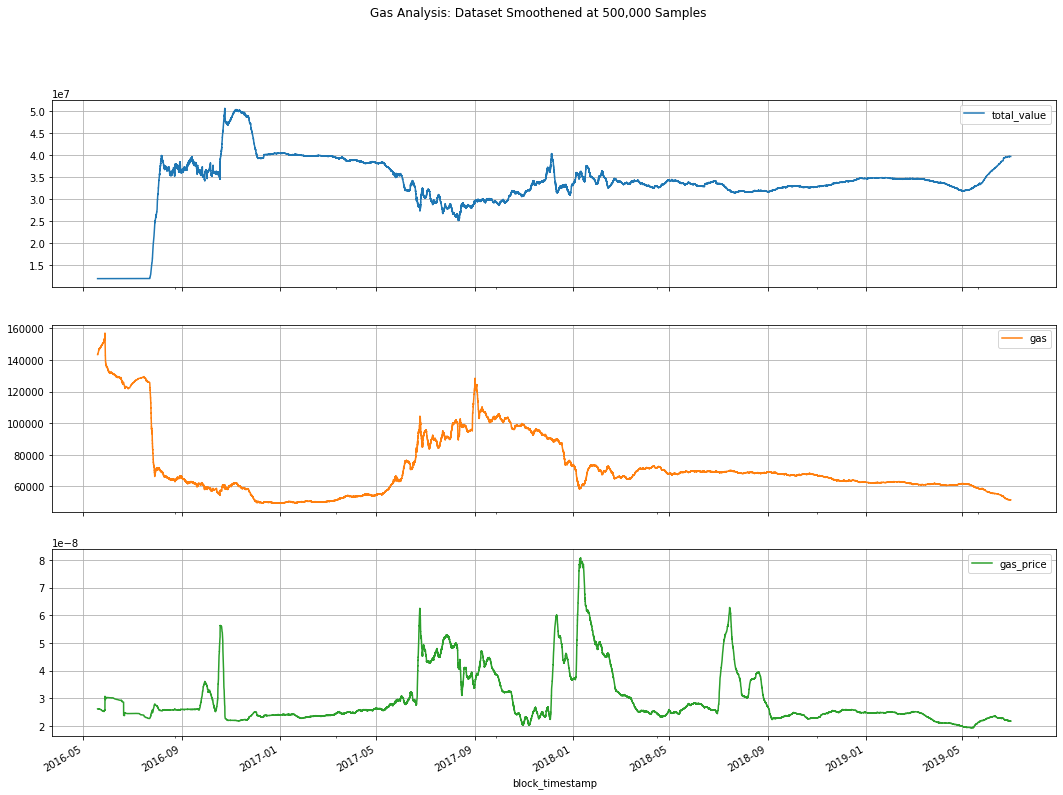

In [19]:
gas_analysis_smooth500K.plot(figsize=(18,13), grid=True,
                             subplots=True,
                             sharex=True, sharey=False,
                             title='Gas Analysis: Dataset Smoothened at 500,000 Samples')

# ETH-USD Price Forecasting

## Forecasting: Data Import

In [20]:
eth_usd_file = "/content/drive/MyDrive/predict-ethUSD-merged.csv"
eth_usd = import_data(file = eth_usd_file, timeline=True, timeline_col='Date')




Dataset preview:


,Closing Price (USD),Closing Price (USD) Prediction
Date,,
2019-06-01 00:00:00+01:00,262.617829,232.099924
2019-06-02 00:00:00+01:00,268.006868,271.159149
2019-06-03 00:00:00+01:00,269.274568,233.795069
2019-06-04 00:00:00+01:00,257.903815,231.145129
2019-06-05 00:00:00+01:00,239.075442,238.644877
...,...,...
2020-12-06 00:00:00+00:00,592.615924,595.382009
2020-12-07 00:00:00+00:00,589.663019,588.288721
2020-12-08 00:00:00+00:00,563.437313,571.848958


## Forecasting: Performance Plot

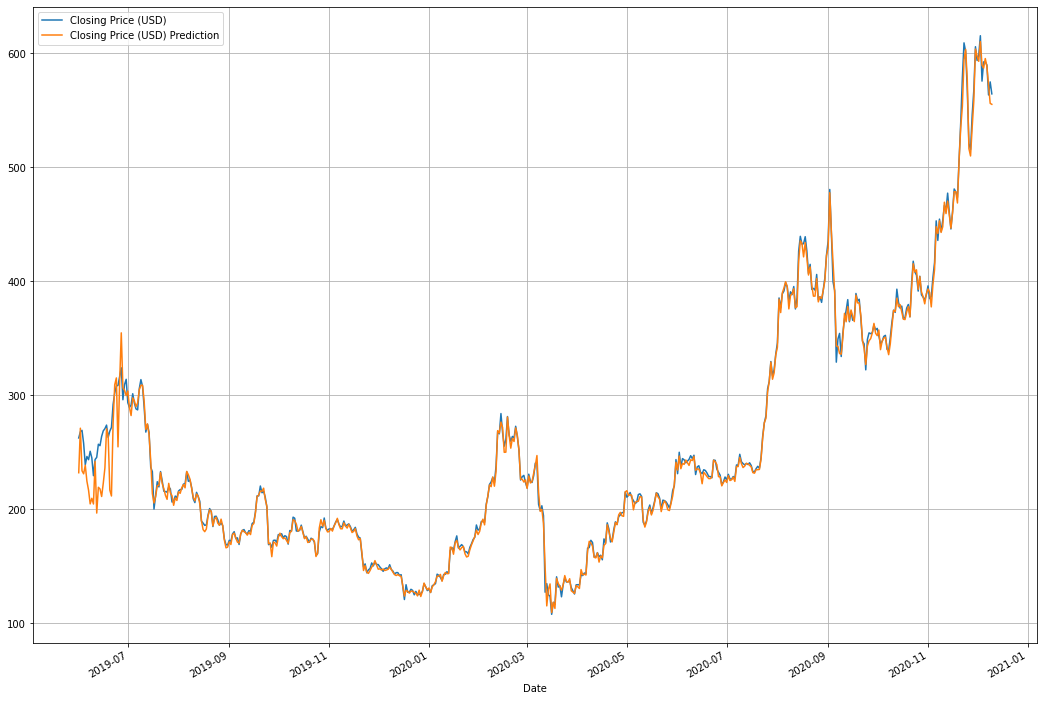

In [21]:
eth_usd.plot(figsize=(18,13), grid=True)